In [1]:
!kaggle datasets download -d rishikeshkonapure/home-loan-approval

  0%|                                               | 0.00/12.6k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 12.6k/12.6k [00:00<00:00, 18.6MB/s]


In [3]:
!unzip -o home-loan-approval.zip

Archive:  home-loan-approval.zip
  inflating: loan_sanction_test.csv  
  inflating: loan_sanction_train.csv  


In [5]:
!wc -l loan_sanction_test.csv

     367 loan_sanction_test.csv


In [6]:
!wc -l loan_sanction_train.csv

     614 loan_sanction_train.csv


In [30]:
import pandas as pd
home_loan_train = pd.read_csv('loan_sanction_train.csv')
home_loan_test = pd.read_csv('loan_sanction_test.csv')
home_loan_train.head

<bound method NDFrame.head of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849            

In [31]:
home_loan_train.describe(include = "all")

Loan_ID Gender Married Dependents Education Self_Employed  \
count        614    601     611        599       614           582   
unique       614      2       2          4         2             2   
top     LP001002   Male     Yes          0  Graduate            No   
freq           1    489     398        345       480           500   
mean         NaN    NaN     NaN        NaN       NaN           NaN   
std          NaN    NaN     NaN        NaN       NaN           NaN   
min          NaN    NaN     NaN        NaN       NaN           NaN   
25%          NaN    NaN     NaN        NaN       NaN           NaN   
50%          NaN    NaN     NaN        NaN       NaN           NaN   
75%          NaN    NaN     NaN        NaN       NaN           NaN   
max          NaN    NaN     NaN        NaN       NaN           NaN   

        ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count        614.000000         614.000000  592.000000         600.00000   
unique              NaN                NaN         NaN               NaN   
top                 NaN                NaN         NaN               NaN   
freq                NaN                NaN         NaN               NaN   
mean        5403.459283        1621.245798  146.412162         342.00000   
std         6109.041673        2926.248369   85.587325          65.12041   
min          150.000000           0.000000    9.000000          12.00000   
25%         2877.500000           0.000000  100.000000         360.00000   
50%         3812.500000        1188.500000  128.000000         360.00000   
75%         5795.000000        2297.250000  168.000000         360.00000   
max        81000.000000       41667.000000  700.000000         480.00000   

        Credit_History Property_Area Loan_Status  
count       564.000000           614         614  
unique             NaN             3           2  
top                NaN     Semiurban           Y  
freq               NaN           233         422  
mean          0.842199           NaN         NaN  
std           0.364878           NaN         NaN  
min           0.000000           NaN         NaN  
25%           1.000000           NaN         NaN  
50%           1.000000           NaN         NaN  
75%           1.000000           NaN         NaN  
max           1.000000           NaN         NaN

In [32]:
home_loan_train["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<Axes: >

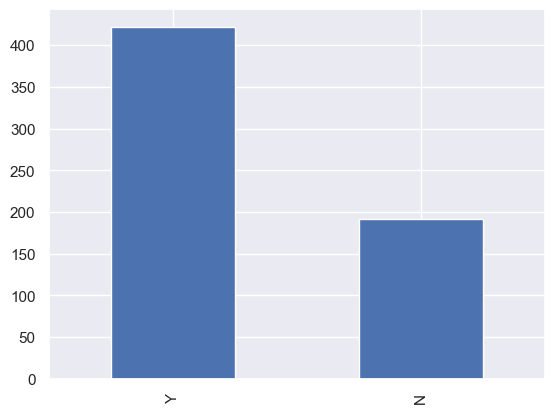

In [33]:
home_loan_train["Loan_Status"].value_counts().plot(kind="bar")

<Axes: xlabel='Loan_Status'>

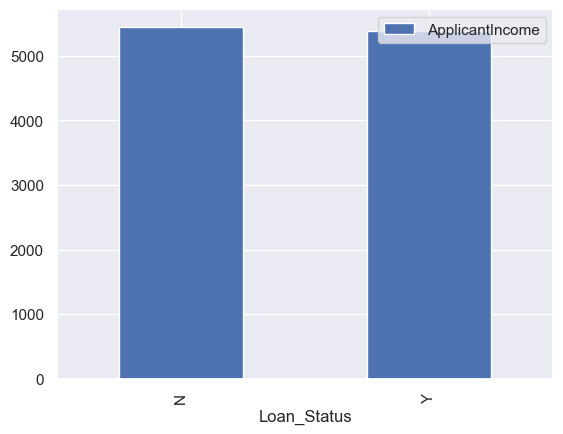

In [34]:
home_loan_train[["Loan_Status", "ApplicantIncome"]].groupby("Loan_Status").mean().plot(kind="bar")

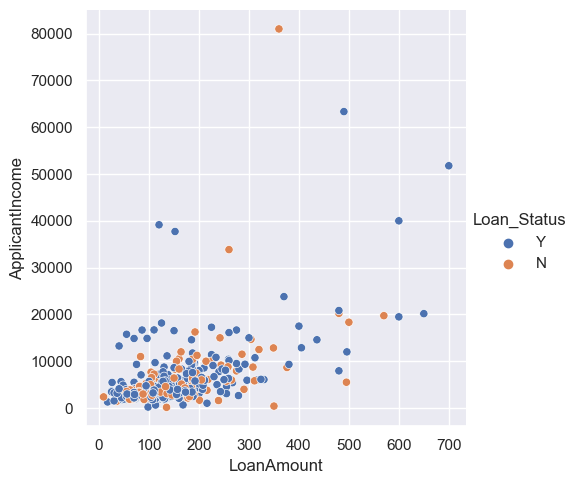

In [35]:
import seaborn as sns
sns.set_theme()
sns.relplot(data=home_loan_train, x="LoanAmount", y="ApplicantIncome", hue="Loan_Status")


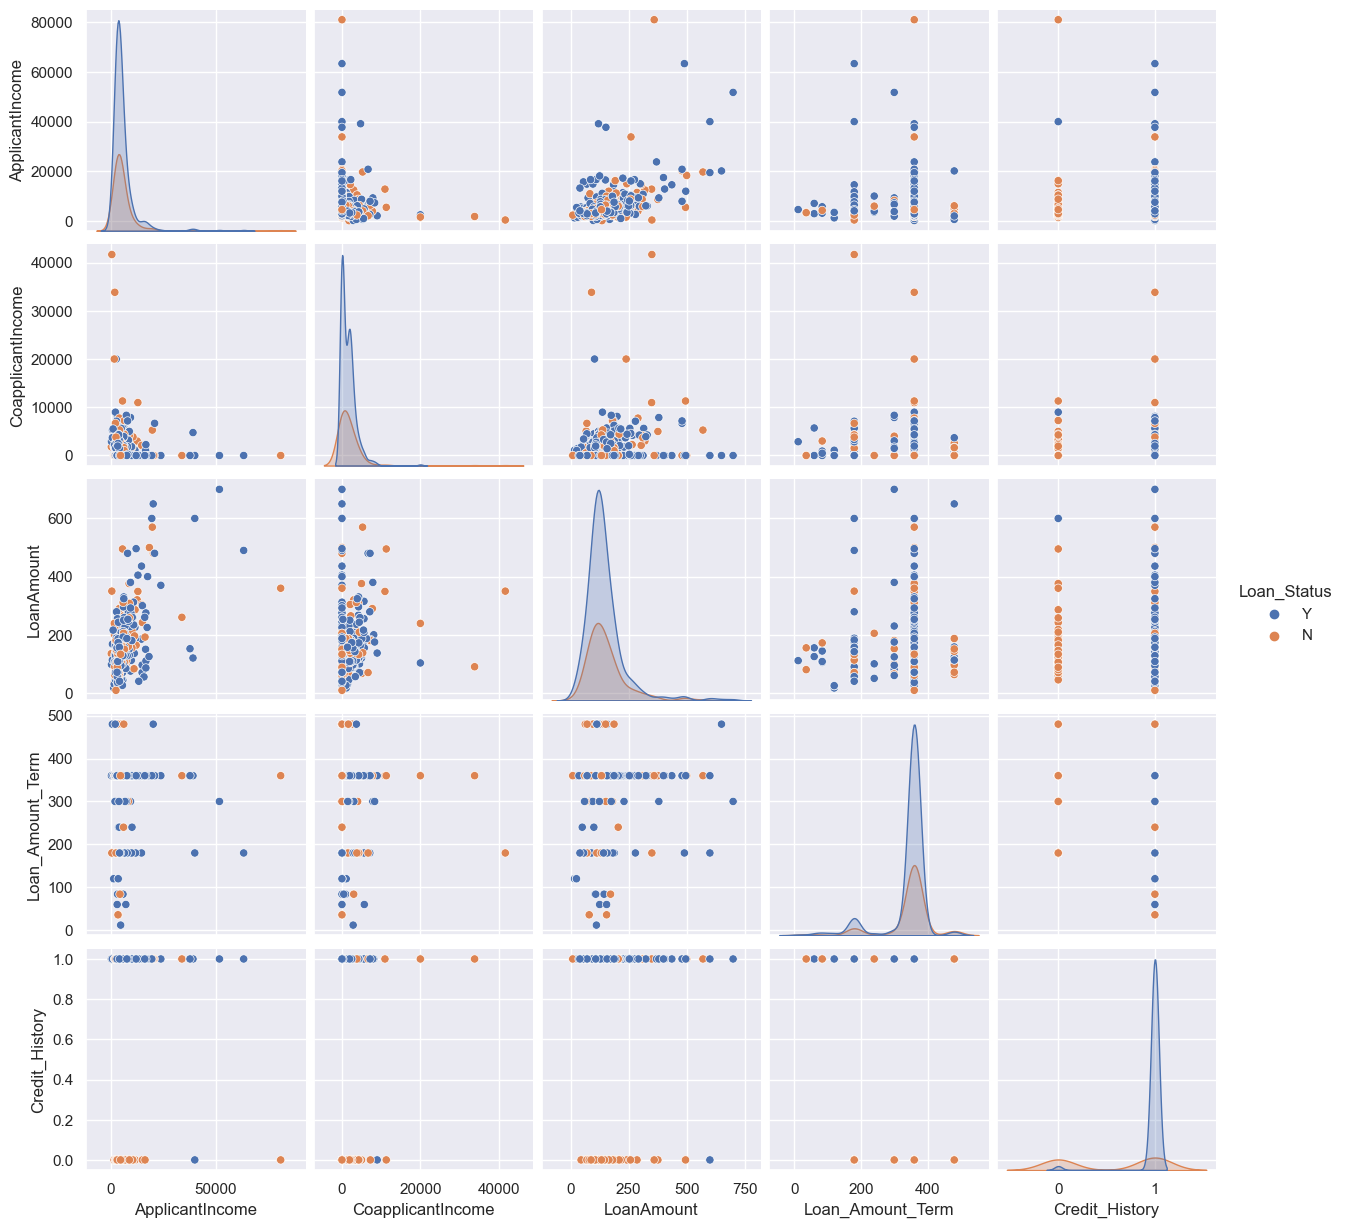

In [36]:
sns.pairplot(data=home_loan_train.drop(columns=["Loan_ID"]), hue="Loan_Status")

In [37]:
from sklearn.model_selection import train_test_split
home_loan_val_final, home_loan_test_final = train_test_split(home_loan_test, test_size=0.5, random_state=1)
home_loan_train_final = home_loan_train

In [38]:
from sklearn.preprocessing import MinMaxScaler
numeric_cols_train = home_loan_train_final.select_dtypes(include='number').columns
numeric_cols_test = home_loan_test_final.select_dtypes(include='number').columns
numeric_cols_val = home_loan_val_final.select_dtypes(include='number').columns
scaler = MinMaxScaler()
home_loan_train_final[numeric_cols_train] = scaler.fit_transform(home_loan_train_final[numeric_cols_train])
home_loan_test_final[numeric_cols_test] = scaler.fit_transform(home_loan_test_final[numeric_cols_test])
home_loan_val_final[numeric_cols_val] = scaler.fit_transform(home_loan_val_final[numeric_cols_val])

home_loan_train_final = home_loan_train_final.dropna()
home_loan_test_final = home_loan_test_final.dropna()
home_loan_val_final = home_loan_val_final.dropna()

home_loan_train_final

Loan_ID  Gender Married Dependents     Education Self_Employed  \
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
5    LP001011    Male     Yes          2      Graduate           Yes   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1           0.054830           0.036192    0.172214          0.743590   
2           0.035250           0.000000    0.082489          0.743590   
3           0.030093           0.056592    0.160637          0.743590   
4           0.072356           0.000000    0.191027          0.743590   
5           0.065145           0.100703    0.373372          0.743590   
..               ...                ...         ...               ...   
609         0.034014           0.000000    0.089725          0.743590   
610         0.048930           0.000000    0.044863          0.358974   
611         0.097984           0.005760    0.353111          0.743590   
612         0.091936           0.000000    0.257598          0.743590   
613         0.054830           0.000000    0.179450          0.743590   

     Credit_History Property_Area Loan_Status  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
5               1.0         Urban           Y  
..              ...           ...         ...  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N  

[480 rows x 13 columns]